In [1]:
import numpy as np
import tensorflow as tf

from data import create_data_gaussian, prepare_data_natural
from model import (
    simple_model,
    get_train,
    get_val,
    prepare_data_reweighter,
    prepare_data_refiner,
    apply_reweighter,
    apply_refiner,
    resample,
)
from plotting import plot_n, plot_n_ratio, plot_w, plot_w2, plot_training

bins = np.arange(-3, 3, 0.1)

In [2]:
data = pos, neg, pos_weights, neg_weights = create_data_gaussian(10_000_000, neg_frac=0.25, neg_scale=0.5, weight_scale=0.2)

Epoch 1/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 72s 1ms/step - accuracy: 0.5003 - loss: 0.4537 - val_accuracy: 0.5000 - val_loss: 0.4532
Epoch 2/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.5003 - loss: 0.4531 - val_accuracy: 0.5000 - val_loss: 0.4531
Epoch 3/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 70s 1ms/step - accuracy: 0.5002 - loss: 0.4525 - val_accuracy: 0.5000 - val_loss: 0.4532
Epoch 4/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 92s 2ms/step - accuracy: 0.5002 - loss: 0.4527 - val_accuracy: 0.5000 - val_loss: 0.4532
Epoch 5/5
50000/50000 ━━━━━━━━━━━━━━━━━━━━ 72s 1ms/step - accuracy: 0.5000 - loss: 0.4527 - val_accuracy: 0.5000 - val_loss: 0.4532


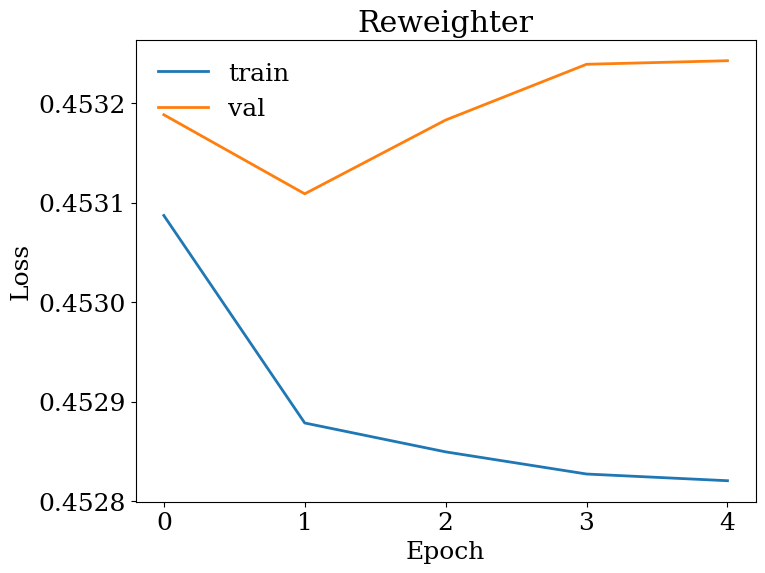

In [3]:
reweighter = simple_model()
reweighter.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train, = get_train(*prepare_data_reweighter(*data))
history_reweighter = reweighter.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_reweighter, title="Reweighter")

Epoch 1/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.7496 - loss: 0.5006 - val_accuracy: 0.7507 - val_loss: 0.4992
Epoch 2/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.7499 - loss: 0.4992 - val_accuracy: 0.7507 - val_loss: 0.5004
Epoch 3/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 37s 1ms/step - accuracy: 0.7498 - loss: 0.4993 - val_accuracy: 0.7507 - val_loss: 0.4993
Epoch 4/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 38s 2ms/step - accuracy: 0.7496 - loss: 0.4995 - val_accuracy: 0.7507 - val_loss: 0.4992
Epoch 5/5
25000/25000 ━━━━━━━━━━━━━━━━━━━━ 36s 1ms/step - accuracy: 0.7499 - loss: 0.4993 - val_accuracy: 0.7507 - val_loss: 0.4991


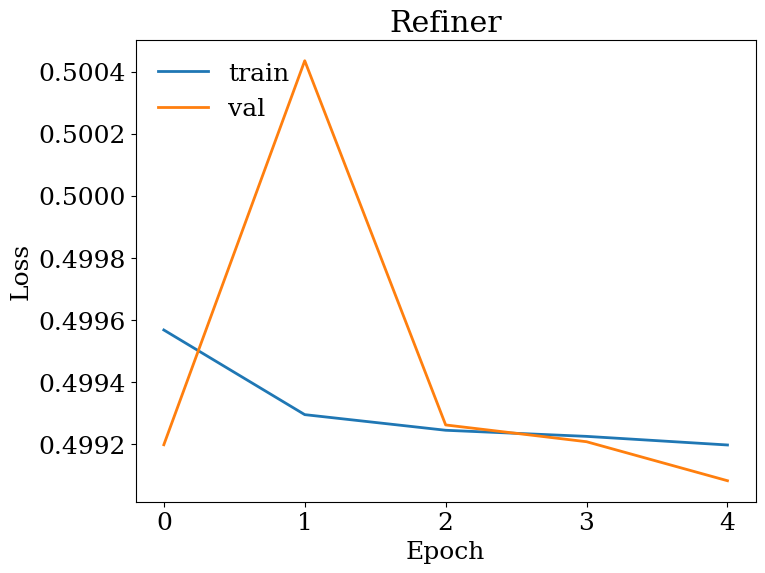

In [4]:
refiner = simple_model()
refiner.compile(optimizer="adam", loss=tf.keras.losses.BinaryCrossentropy(from_logits=False), metrics=["accuracy"])
x_train, y_train, w_train = get_train(*prepare_data_refiner(*data))
history_refiner = refiner.fit(x_train, y_train, sample_weight=w_train, epochs=5, validation_split=0.2, batch_size=256)
plot_training(history_refiner, title="Refiner")

In [5]:
data_natural = get_val(*prepare_data_natural(*data))
data_reweighter = get_val(*apply_reweighter(*data, reweighter=reweighter))
data_refiner = get_val(*apply_refiner(*data, refiner=refiner))

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


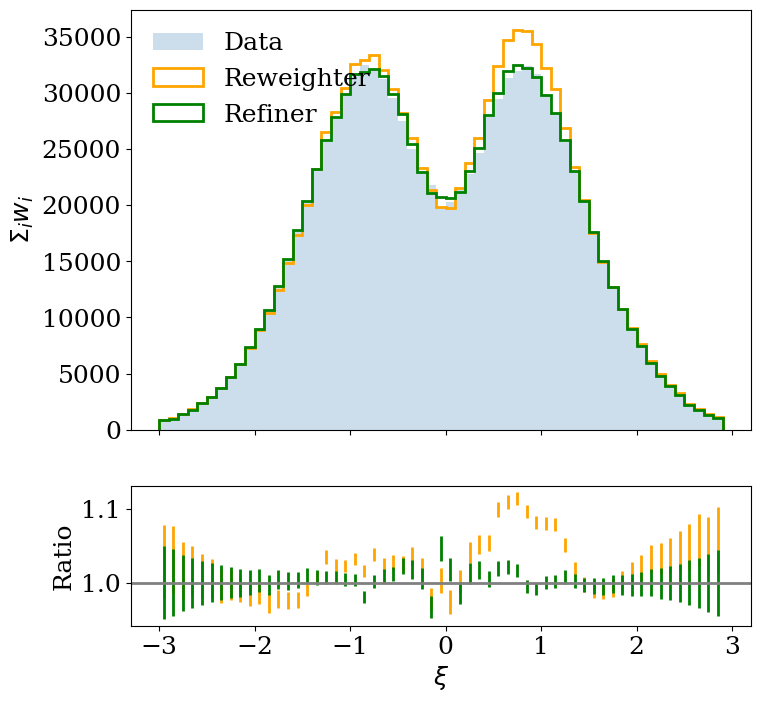

In [6]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=bins)

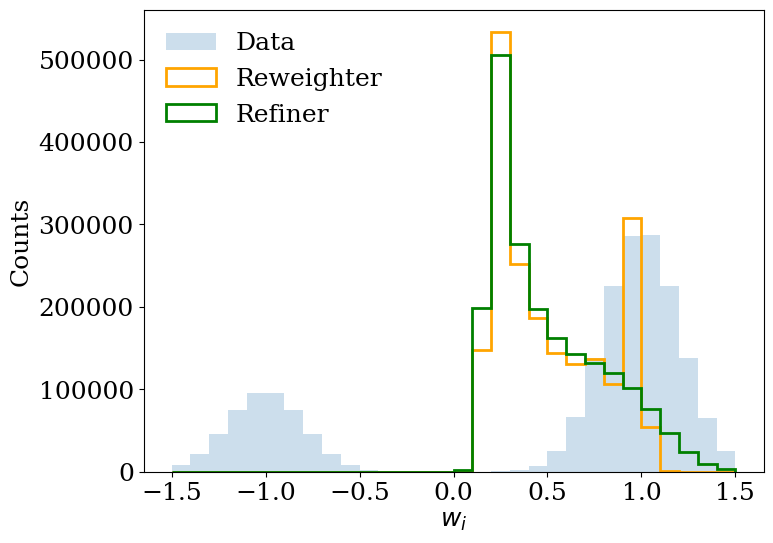

In [7]:
plot_w(data=data_natural, reweighter=data_reweighter, refiner=data_refiner, bins=np.arange(-1.5, 1.6, 0.1))

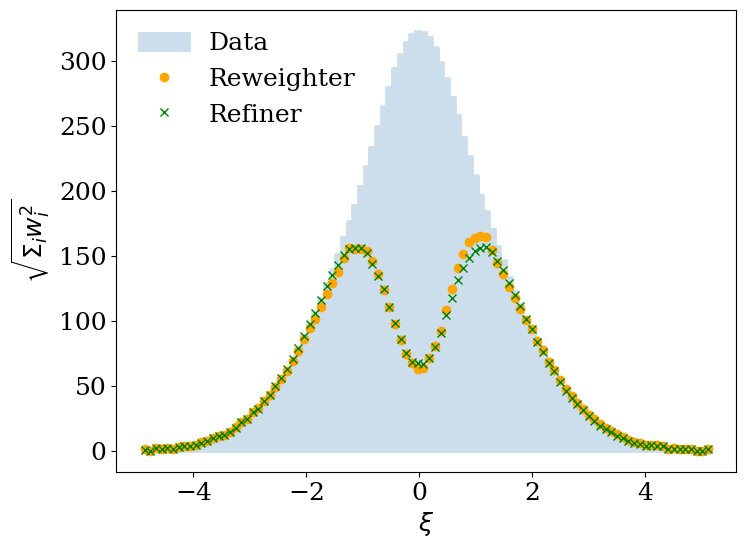

In [8]:
plot_w2(data=data_natural, reweighter=data_reweighter, refiner=data_refiner)

In [9]:
data_reweighter_resampled = resample(*data_reweighter)
data_refiner_resampled = resample(*data_refiner)
len(data_reweighter_resampled[0]), len(data_refiner_resampled[0])

(688129, 632533)

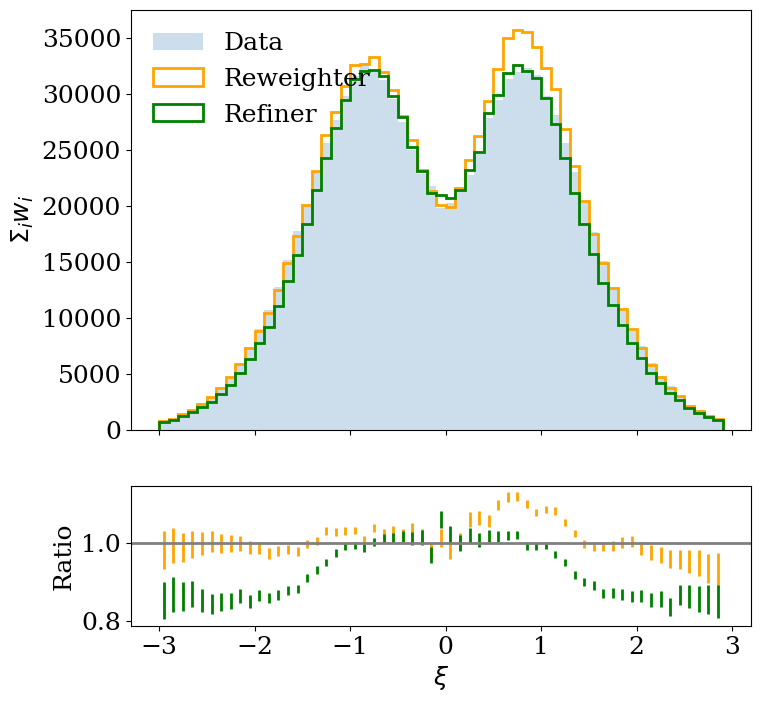

In [10]:
plot_n_ratio(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=bins)

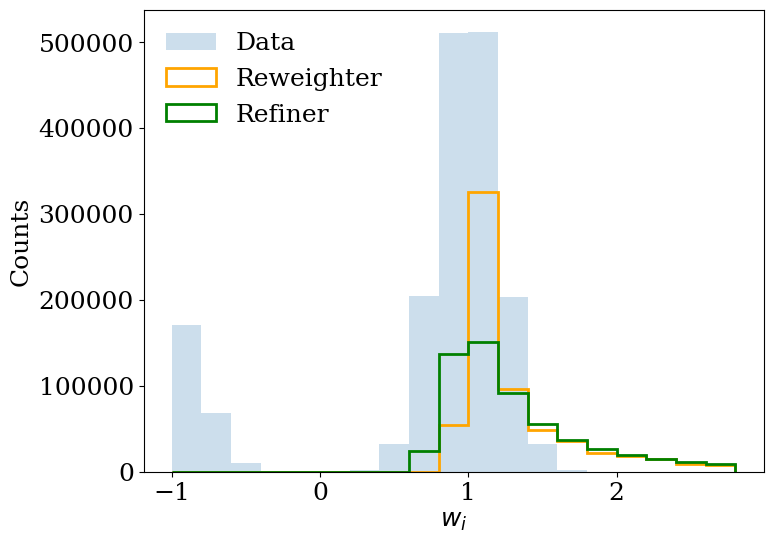

In [11]:
plot_w(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled, bins=np.arange(-1, 3.0, 0.2))

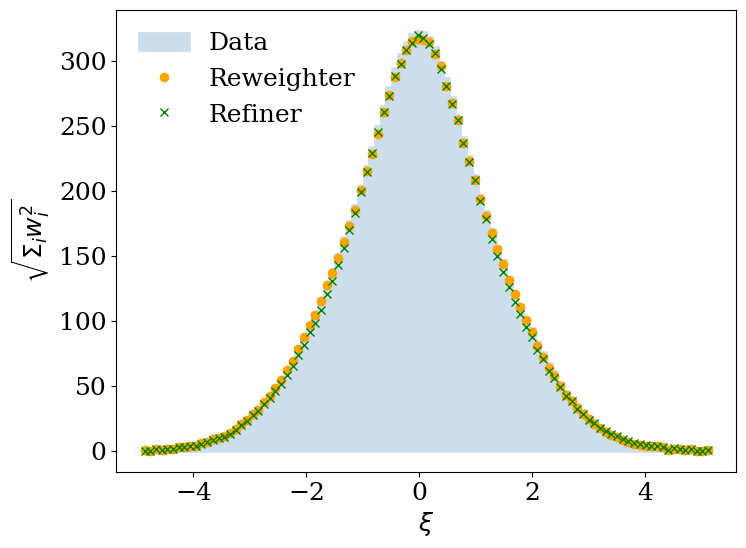

In [12]:
plot_w2(data=data_natural, reweighter=data_reweighter_resampled, refiner=data_refiner_resampled)